<a href="https://colab.research.google.com/github/Sachin243/Sparks/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 2: Prediction using Unsupervised ML**

**Name: Sachin Singh**

 **Problem Statement:**

---



Predict the optimum number of clusters and represent it visually.  

## Import the libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Iris Dataset

In [30]:
iris = pd.read_csv('Iris.csv')
X = iris.iloc[:, [3,4]].values
#X = iris.iloc[:, [1,2,3,4]].values

In [31]:
## first five rows of data 
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
## data size
iris.shape

(150, 6)

In [33]:
## frquency distribution of species
species = pd.crosstab(index= iris['Species'], columns= 'count')
species

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


There are 50 rows for each species.

In [34]:
## description of dataset 
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data Visualisation

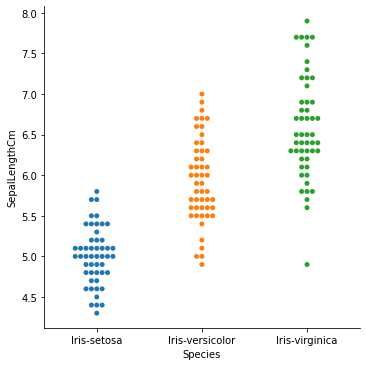

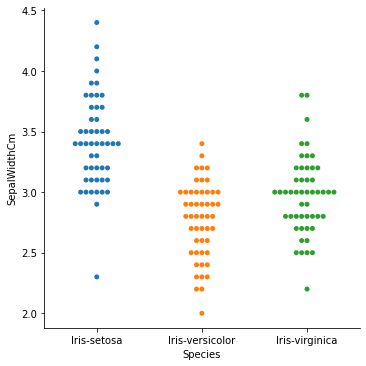

In [35]:
## categorical graph between 1. species and sepal length 2. species and petal length 
sns.catplot(data = iris, kind = 'swarm', x = 'Species', y = 'SepalLengthCm')
sns.catplot(data = iris, kind = 'swarm', x = 'Species', y = 'SepalWidthCm')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


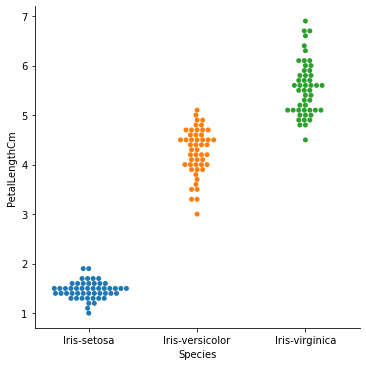

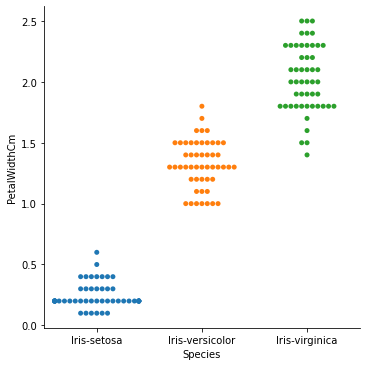

In [36]:
## categorical graph between 1. species and sepal width 2. species and petal width
sns.catplot(data = iris, kind = 'swarm', x = 'Species', y = 'PetalLengthCm')
sns.catplot(data = iris, kind = 'swarm', x = 'Species', y = 'PetalWidthCm')

From above plots, we can conclude that there is a big difference in petal size among different species and slight difference in sepal size.

## Elbow Method to find optimal number of clusters

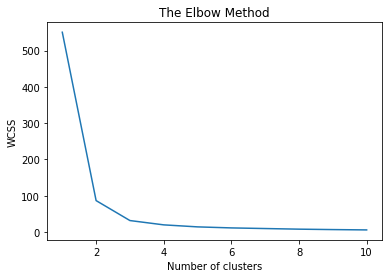

In [37]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state= 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

From here, we can conclude that there are 3 clusters in our dataset.

# Training model on Iris dataset

In [38]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [39]:
## output data- species labelled as 0,1,2
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


In [40]:
## center points
centers = kmeans.cluster_centers_
print(centers)

[[1.464      0.244     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


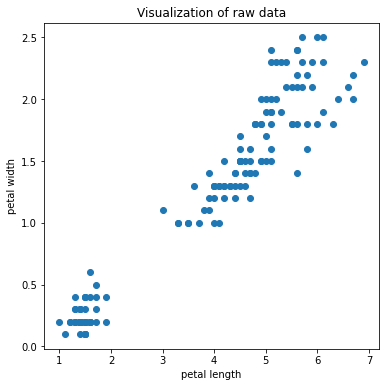

In [43]:
## Original Data
plt.figure(figsize=(6, 6))
plt.scatter(iris.iloc[:, 3], iris.iloc[:, 4])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Visualization of raw data');

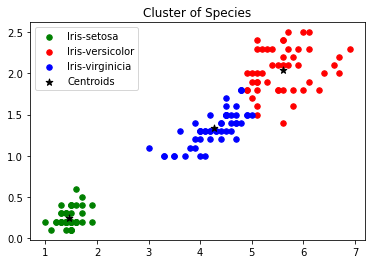

In [41]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'green', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'red', label = 'Iris-versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'blue', label = 'Iris-virginicia')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black',marker = '*' ,label = 'Centroids')
plt.title('Cluster of Species')
plt.legend()
plt.show()